# Изучение рынка заведений общественного питания Москвы

- Автор: Ивегеш Ольга
- Дата: 09.04.2025

### Цели и задачи проекта

- Познакомиться с данными
- Проверить их корректность и провести предобработку
- Провести исследовательский анализ исходных данных
- Ответить на вопросы

### Описание данных

#### Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;
1 — заведение является сетевым.
- seats — количество посадочных мест.
#### Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

- На первом этапе необходимо загрузить данные и познакомиться с ними
- Объединить два файла в один
- Далее привести данные к удобному виду (изменить названия столбцов при необходимости)
- Откорректировать типы данных
- Проверить наличие дубликатов и устранить их при необходимости
- Добавить новый столбец о работе круглосуточно
- Построить необходимые графики
- Вывести ТОП-15 популярных сетей в Москве

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

!pip install phik

from phik import phik_matrix

In [2]:
rest_info=pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price=pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

In [3]:
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

#### Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
- Представленная таблица состоит из 9 столбцов и 8406 строк. В столбце hours есть пропуски, которые можно заменить на пустую строку
- Названия столбцов приведены к стилю snake case.
#### Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
- Представленная таблица состоит из 5 столбцов и 4058 строк. В столбцах price и avg_bill есть пропуски, которые можно заменить на пустую строку
- Названия столбцов приведены к стилю snake case.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [7]:
df=rest_info.merge(rest_price, on='id', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [8]:
df.tail()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN
8405,9d56f8f7a7f74df1a925bc0fd2de8aae,Kebab Time,кафе,"Москва, Россошанский проезд, 6",Южный административный округ,"ежедневно, круглосуточно",3.9,0,12.0,NaN,NaN,NaN,NaN


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [9]:
columns_to_low_float = ['rating', 'seats', 'middle_avg_bill', 'middle_coffee_cup' ]

for i in columns_to_low_float:
  df[i]=pd.to_numeric(df[i], downcast='float')
df['chain']=pd.to_numeric(df['chain'], downcast='integer')

In [10]:
columns_to_replace = ['hours', 'price', 'avg_bill']

for i in columns_to_replace:
    df[i] = df[i].fillna('')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  535 non-null    float32
dtypes: float32(4), int8(1), object(8)
memory usage: 730.6+ KB


- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [12]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                3611
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [13]:
df.isna().sum()/len(df)

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.000000
rating               0.000000
chain                0.000000
seats                0.429574
price                0.000000
avg_bill             0.000000
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

In [14]:
df.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.000000
rating               0.000000
chain                0.000000
seats                0.429574
price                0.000000
avg_bill             0.000000
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

Достаточно большой процент данных пропущен в столбцах seats, middle_avg_bill и middle_coffee_cup. Считаю, что нужно оставить как есть, так как подбор значений не будет корректным и не будет соответствовать реальности, что исказит анализ. Так же удаление тоже не возможно, потому что удалится слишком большой процент данных.

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [15]:
print(df.duplicated().sum())

0


- Посмотрим неявные дубликаты, где необходимо заменим значения, чтоб стало меньше уникальных строк.

In [16]:
df_name = sorted(df['name'].unique())
df_name_count=df['name'].nunique()
df_name_count

5614

In [17]:
df_address = sorted(df['address'].unique())
df_address_count=df['address'].nunique()
df_address_count

5753

In [18]:
df['name'] =[s.lower() for s in df['name']]
df['name'] = [s.title() for s in df['name']]
df_name = sorted(df['name'].unique())
df_name_count=df['name'].nunique()
df_name_count

5512

In [19]:
df['address'] =[s.lower() for s in df['address']]
df['address'] = [s.title() for s in df['address']]
df_address = sorted(df['address'].unique())
df_address_count=df['address'].nunique()
df_address_count

5752

In [20]:
df.duplicated(subset=['name','address']).sum()

4

In [21]:
df = df.drop_duplicates(subset=['name','address'], keep='first').reset_index(drop=True)

In [22]:
df.duplicated(subset=['name','address']).sum()

0

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [23]:
df['is_24_7']=df['hours'].str.contains('ежедневно, круглосуточно')
df

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,Wowфли,кафе,"Москва, Улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,,,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,Четыре Комнаты,ресторан,"Москва, Улица Дыбенко, 36, Корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская Улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, Улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная Улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8397,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная Улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,,,NaN,NaN,False
8398,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский Проспект, 19, Корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,,,NaN,NaN,False
8399,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская Улица, 112А, Стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,,Средний счёт:от 150 ₽,150.0,NaN,True
8400,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская Улица, 112А, Стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,,,NaN,NaN,True


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

- Изучены данные. Изначально в данных были пропуски, некоторые данные были неправильного типа, присутствовали дубликаты.
- В ходе работы были изменены типы данных на более подходящие, исправлены ошибки и дополнены запрошенные данные. Также данные были очищены от дубликатов (неявных)

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [24]:
df['category'].value_counts()

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

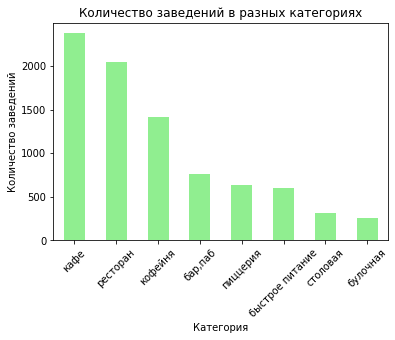

In [25]:
df['category'].value_counts().plot(kind='bar',
                                color='lightgreen',
                                legend=False)
plt.title('Количество заведений в разных категориях')
plt.ylabel('Количество заведений')
plt.xlabel('Категория')
plt.xticks(rotation=45)
plt.show()

##### Вывод
Самым многочисленным типом заведения является кафе - 2376 шт. Самым малочисленным булочная - 256 шт. 

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [26]:
df['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

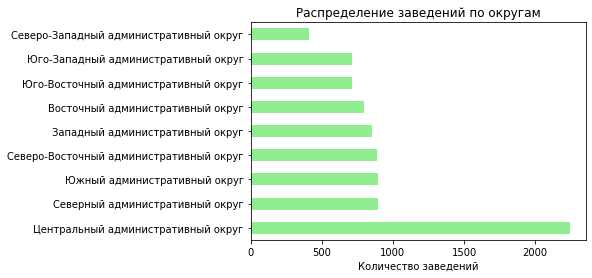

In [27]:
df['district'].value_counts().plot(kind='barh',
                                color='lightgreen',
                                legend=False)
plt.title('Распределение заведений по округам')
plt.xlabel('Количество заведений')
plt.show()

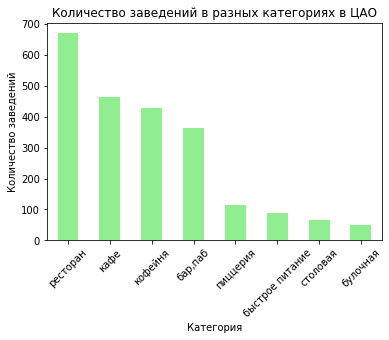

In [28]:
df.loc[(df['district']=='Центральный административный округ'),'category'].value_counts().plot(kind='bar',
                                color='lightgreen',
                                legend=False)
plt.title('Количество заведений в разных категориях в ЦАО')
plt.ylabel('Количество заведений')
plt.xlabel('Категория')
plt.xticks(rotation=45)
plt.show()

##### Вывод
Большее количество заведений находится в ЦАО. В САО, ЮАО и СВАО одинаково распределяются заведения. Меньше всего заведений в СЗАО. Внутри ЦАО больше всего ресторанов (более 650шт.) и меньше всего булочныз (менее 50шт)

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

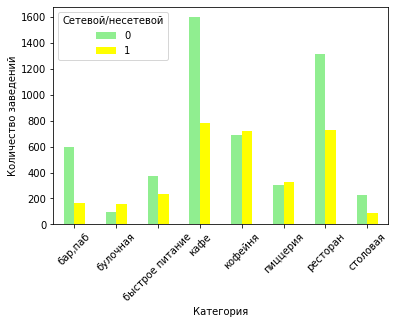

In [29]:
df.groupby('category')['chain'].value_counts().unstack(fill_value=0).plot(kind='bar', legend=True, color=['lightgreen','yellow'])
plt.ylabel('Количество заведений')
plt.xlabel('Категория')
plt.legend(title='Сетевой/несетевой')
plt.xticks(rotation=45)
plt.show()

In [30]:
df.groupby('chain')['name'].count().sort_values()

chain
1    3203
0    5199
Name: name, dtype: int64

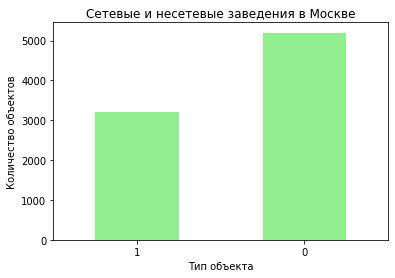

In [31]:
df.groupby('chain')['name'].count().sort_values().plot(kind='bar', color='lightgreen')
plt.title('Сетевые и несетевые заведения в Москве')
plt.xlabel('Тип объекта')
plt.ylabel('Количество объектов')
plt.xticks(rotation=0)
plt.show()

In [32]:
# Создадим сводную таблицу
df_pivot = df.pivot_table(index='category', values='id', columns='chain', aggfunc='count').reset_index()
df_pivot['share_chain %'] = (df_pivot[1] / (df_pivot[1] + df_pivot[0])* 100).round(2)
df_pivot.drop(df_pivot.columns[[1,2]], axis=1, inplace=True)
df_pivot = df_pivot.sort_values('share_chain %', ascending = False)
df_pivot

chain,category,share_chain %
1,булочная,61.33
5,пиццерия,52.13
4,кофейня,50.96
2,быстрое питание,38.47
6,ресторан,35.70
3,кафе,32.79
7,столовая,27.94
0,"бар,паб",21.99


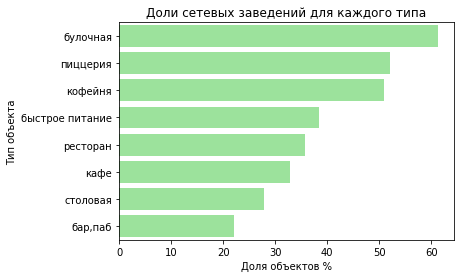

In [33]:
sns.barplot(x='share_chain %', y='category', data=df_pivot.sort_values('share_chain %', ascending=False), color='lightgreen')
plt.title('Доли сетевых заведений для каждого типа')
plt.xlabel('Доля объектов %')
plt.ylabel('Тип объекта')
plt.show()

##### Вывод
Несетевых заведений оказалось больше. ПО категориям оказалось, что чуть больше 20% баров, пабов являются сетевыми. А  булочные напротив в большинстве (более 60%) являются сетевыми. 

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


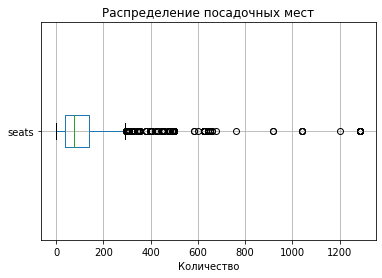

In [34]:
boxplot = df.boxplot(column='seats',
                     vert=False)
# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение посадочных мест')
boxplot.set_xlabel('Количество')
plt.show()

- На графике видно, что значения выше 300 являются выбросами

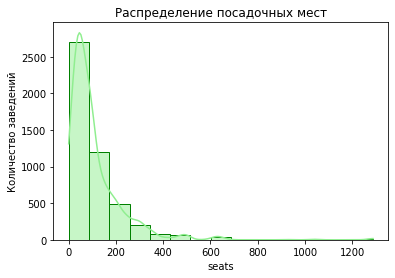

In [35]:
sns.histplot(data=df, x='seats', bins=15, kde=True, color='lightgreen',edgecolor='green' )
plt.title('Распределение посадочных мест')
plt.ylabel('Количество заведений')
plt.show()

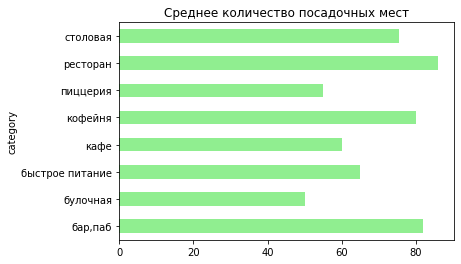

In [36]:
df.groupby('category').agg({'seats' : 'median'}).plot(kind='barh',
                                color='lightgreen',
                                legend=False)
plt.title('Среднее количество посадочных мест')
plt.show()

##### Вывод
Наибольшее количество заведений имеет до 200 посадочных мест. В ресторанах наибольшее среднее количество мест (более 80 шт). В булочных в среднем мест меньше (окло 50 шт)

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [37]:
df.groupby('category').agg({'rating':'mean'}).round(2)

,rating
category,
"бар,паб",4.39
булочная,4.27
быстрое питание,4.05
кафе,4.12
кофейня,4.28
пиццерия,4.30
ресторан,4.29
столовая,4.21


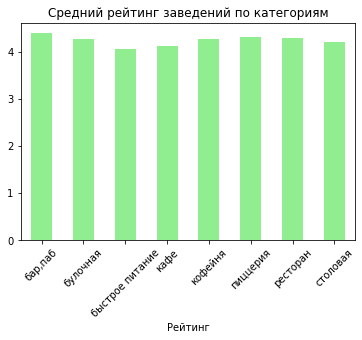

In [38]:
df.groupby('category').agg({'rating':'mean'}).plot(kind='bar',
                                color='lightgreen',
                                legend=False)
plt.title('Средний рейтинг заведений по категориям')
plt.xlabel('Рейтинг')
plt.xticks(rotation=45)
plt.show()

##### Вывод
В целом заведения всех категорий в среднем имеют рейтинг более 4. 
Заведения быстрого питания имеют наименьший рейтинг (4.05), пабы, бары наибольший (4.39)

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

interval columns not set, guessing: ['rating', 'chain', 'seats', 'middle_avg_bill']


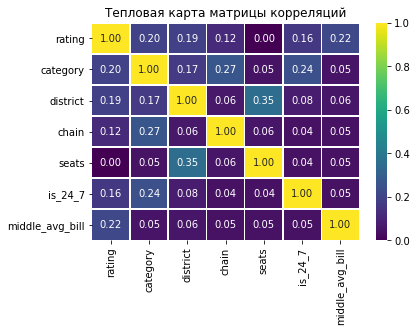

In [39]:
# Посчитаем матрицу корреляций
corr_matrix = df[['rating','category','district','chain','seats','is_24_7','middle_avg_bill']].phik_matrix()

# Создаём тепловую  карту
sns.heatmap(corr_matrix,annot=True, fmt='.2f', linewidths=0.5, cmap='viridis')

# Показываем график с заголовком
plt.title('Тепловая карта матрицы корреляций')
plt.show()

In [40]:
df_price=df.groupby('price').agg({'rating':['mean','median']})
df_price

rating       
                   mean median
price                         
               4.166778    4.3
высокие        4.436611    4.4
выше среднего  4.386348    4.4
низкие         4.173077    4.2
средние        4.297874    4.3

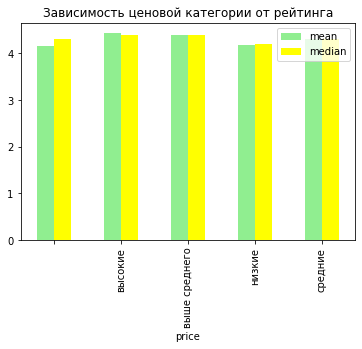

In [41]:
df_price.plot(kind='bar',
        color=['lightgreen','yellow'],  
        title='Зависимость ценовой категории от рейтинга')
plt.legend(['mean', 'median'])
plt.show()

##### Вывод

- mean: У заведений с категорией цен высокие самый высокий рейтинг. У заведений с категорией цен низкие рейтинг самый низкий среди заведений с указанными категориями. У заведений без указания категории цен наиболее низкий рейтинг. 
- median: У заведений с категорией цен высокие и выше среднего самый высокий рейтинг. У заведений с категорией цен низкие рейтинг самый низкий. 
###### Чем выше категория цен, тем выше рейтиг заведения

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [42]:
top=df.groupby('name').agg({
    'id': 'count',
    'rating': 'mean',
    'category':'min'
}).sort_values(by='id',ascending=False)

top=top[0:15]
top

,id,rating,category
name,,,
Кафе,188,3.884574,"бар,паб"
Шоколадница,120,4.177500,кафе
Домино'С Пицца,77,4.171429,пиццерия
Додо Пицца,74,4.286487,пиццерия
One Price Coffee,72,4.069445,кофейня
Яндекс Лавка,69,3.872464,ресторан
Cofix,65,4.075385,кофейня
Prime,50,4.116000,кафе
Хинкальная,44,4.322727,"бар,паб"


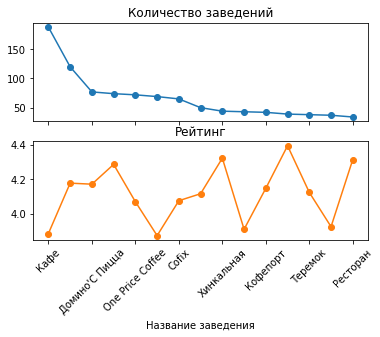

In [43]:
top.plot(kind='line',
            subplots=True,
            sharex=True,
            sharey=False,
            legend=False,
            marker='o',
            title=['Количество заведений', 'Рейтинг'])

# Подписываем оси
plt.xlabel('Название заведения')
plt.xticks(rotation=45)
plt.show()

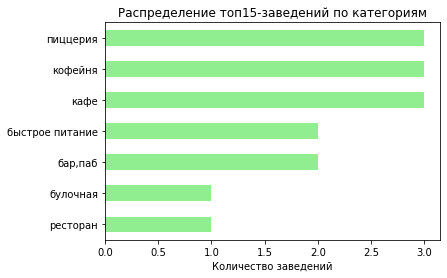

In [44]:
top['category'].value_counts().sort_values().plot(kind='barh',
                                color='lightgreen',
                                legend=False)
plt.title('Распределение топ15-заведений по категориям')
plt.xlabel('Количество заведений')
plt.show()

##### Вывод
Лидирующее место в топ-15 сетевых завдеений занимает сеть пабов Кафе. Включает в себя 188 заведений со средним рейтингом 3.88. При распределении по категориям в топ-15 сетевых заведений входит по 3 кофейни, пиццерии и кафе. Это самые популярные категории сетевых заведений 

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [45]:
bill=df.groupby('district').agg({
    'middle_avg_bill': 'mean'
}).sort_values(by='middle_avg_bill', ascending=False)
bill

,middle_avg_bill
district,
Центральный административный округ,1191.057495
Западный административный округ,1053.225464
Северный административный округ,927.959656
Южный административный округ,834.398071
Северо-Западный административный округ,822.222900
Восточный административный округ,820.626953
Юго-Западный административный округ,792.561707
Северо-Восточный административный округ,716.611267
Юго-Восточный административный округ,654.097961


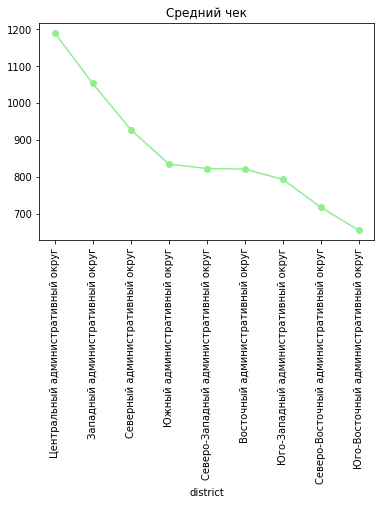

In [46]:
bill.plot(kind='line',
          color='lightgreen',
          legend=False,
          marker='o')
plt.title('Средний чек')
plt.xticks(rotation=90)
plt.show()

In [47]:
bill2=df.groupby('district').agg({
    'middle_avg_bill': ['mean','median']
})
bill2

middle_avg_bill        
                                                   mean  median
district                                                       
Восточный административный округ             820.626953   575.0
Западный административный округ             1053.225464  1000.0
Северный административный округ              927.959656   650.0
Северо-Восточный административный округ      716.611267   500.0
Северо-Западный административный округ       822.222900   700.0
Центральный административный округ          1191.057495  1000.0
Юго-Восточный административный округ         654.097961   450.0
Юго-Западный административный округ          792.561707   600.0
Южный административный округ                 834.398071   500.0

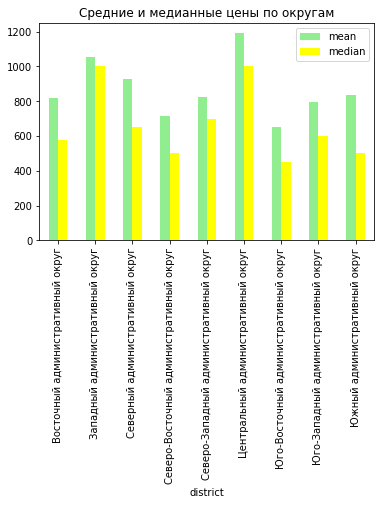

In [48]:
bill2.plot(kind='bar', color=['lightgreen','yellow'])
plt.legend(['mean', 'median'])
plt.title('Средние и медианные цены по округам')
plt.show()

##### Вывод
Цены в Центральном административном округе значительно выше, чем в других округах. Больше всего средняя цена от медианной отличается в ЮАО (более 300руб)

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

- Цены в Центральном административном округе значительно выше, чем в других округах.
- В топ15 наиболее популярны заведения типа кафе, пиццерия и кофейня (по 3 заведения).
- Самое популярное сетевое заведение Кафе (188 точек), средний рейтинг этой сети 3.88, категория паб,бар
- Кофейня, пиццерия и булочная чаще являются сетевыми, в отличии от остальных категорий

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

- Загружены и изучены данные.
- Объединены в один дата фрейм два файла.
- Проведен анализ и предобработка данных. У столбцов rating, seats, middle_avg_bill, middle_coffee_cup  скорректированы типы данных. В столбцах hours, price и avg_bill пропуски заменены на пустые строки. В адресах и именах регистр приведен к одинаковому для избежания дублирования. Удалены 4 дубликата
- Добавлен новый столбец о работе круглосуточно.
- Построены необходимые графики. Изучено количество заведений по категориям, количество заведений в ЦАО. Проанализирован средний рейтинг по категориям заведений. 
- Выведен ТОП-15 популярных сетей в Москве.
- Проанализирован средний счет по заведениям, цены в ЦАО выше, чем  других округах. Наибольшая разница между медианной и среднрей ценой наблюдается в ЮАО